# FRF FILES

## G-Drive

In [1696]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Libraries

In [1697]:
import os
import glob
import pandas as pd
import numpy as np
from scipy import interpolate
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [1746]:
dir = '/gdrive/My Drive/YL TEZ/py/data_whoi/FRF/'

In [1747]:
os.chdir(dir)

In [1748]:
date = glob.glob('*.xlsx')

## Including Datasets

In [1749]:
o = -1

In [1751]:
date[o]

'19940814_FRF-new.xlsx'

In [1752]:
Data1 = pd.read_excel(date[o])
Data1 = Data1[['Profile Number', 'xFRF', 'yFRF', 'Elevation', 'Date']]
Data860 = Data1.loc[(Data1['Profile Number'] == 905)].reset_index()
Data1029 = Data1.loc[(Data1['Profile Number'] == 937)].reset_index()

## INTERPOLATION

y = 860

In [1754]:
x_veri = Data860.xFRF.values
d_veri = Data860.Elevation.values

x = np.arange(int(x_veri.min()+1), int(x_veri.max()), 1)

f = interpolate.interp1d(x_veri, d_veri, kind='linear')
d = f(x)

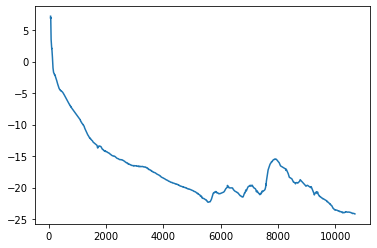

In [1755]:
plt.plot(x,d)
plt.show()

In [1756]:
Data_860 = pd.DataFrame()
Data_860['x'] = x.tolist()
Data_860['d'] = d.tolist()

In [1757]:
y860 = [905 for fb in range(len(Data_860))]

In [1758]:
Data_860['y'] = y860

y = 1029

In [1759]:
x_veri = Data1029.xFRF.values
d_veri = Data1029.Elevation.values

x = np.arange(int(x_veri.min()+1), int(x_veri.max()), 1)

f = interpolate.interp1d(x_veri, d_veri, kind='linear')
d = f(x)

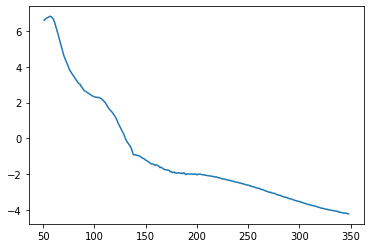

In [1760]:
plt.plot(x,d)

In [1761]:
Data_1029 = pd.DataFrame()
Data_1029['x'] = x.tolist()
Data_1029['d'] = d.tolist()

In [1762]:
y1029 = [937 for fb in range(len(Data_1029))]

In [1763]:
Data_1029['y'] = y1029

HEAD & TAIL

In [1764]:
if not len(Data_860.index[Data_860['x'] == Data_1029.x.values.min() ]) == 0:
  head_index = Data_860.index[Data_860['x'] == Data_1029.x.values.min() ][0]
  head = Data_860.iloc[:head_index,0:2]
else:
  head_index = Data_1029.index[Data_1029['x'] == Data_860.x.values.min() ][0]
  head = Data_1029.iloc[:head_index,0:2]

In [1765]:
if not len(Data_1029.index[Data_1029['x'] == Data_860.x.values.max() ]) == 0:
  tail_index = Data_1029.index[Data_1029['x'] == Data_860.x.values.max() ][0]
  tail = Data_1029.iloc[tail_index:,0:2]
else:
  tail_index = Data_860.index[Data_860['x'] == Data_1029.x.values.max() ][0]
  tail = Data_860.iloc[tail_index:,0:2]

MIDDLE POINTS

In [1766]:
idx_no = abs(tail.x.values[0]-head.x.values[-1])

In [1767]:
idx_no-1

294

In [1768]:
d_929 = []
if len(Data_1029) < len(Data_860):
  for idx in range(idx_no-1):
    step = (Data_1029['d'][idx] - Data_860['d'][idx+head_index]) / (937-905)
    val_d = (Data_860['d'][idx+head_index]) + (step*(929-905))
    d_929.append(val_d)
  Data_929 = pd.DataFrame()
  Data_929['x'] = [fba for fba in range(head.x.values[-1]+1, tail.x.values[0])]
  Data_929['d'] = d_929
  Data_929['y'] = [929 for fb in range(head.x.values[-1]+1, tail.x.values[0])]
else:
  for idx in range(idx_no-head_index):
    step = (Data_1029['d'][idx] - Data_860['d'][idx+head_index]) / (937-905)
    val_d = (Data_860['d'][idx+head_index]) + (step*(929-905))
    d_929.append(val_d)
  Data_929 = pd.DataFrame()
  Data_929['x'] = [fba for fba in range(head.x.values[-1]+1, tail.x.values[0]-head_index+1)]
  Data_929['d'] = d_929
  Data_929['y'] = [929 for fb in range(head.x.values[-1]+1, tail.x.values[0]-head_index+1)]

In [1769]:
Data_929 = pd.concat([head, Data_929], ignore_index=True)
Data_929 = pd.concat([Data_929, tail], ignore_index=True)
Data_929 = Data_929.replace(to_replace=np.NaN, value=929)

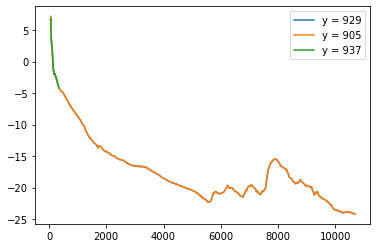

In [1770]:
plt.plot(Data_929.x.values, Data_929.d.values, label='y = 929')
plt.plot(Data_860.x.values, Data_860.d.values, label='y = 905')
plt.plot(Data_1029.x.values, Data_1029.d.values, label='y = 937')
plt.legend(loc='best')
plt.show()

In [1771]:
%pip install XlsxWriter

In [1772]:
date[o][0:8]

'19940814'

In [1773]:
os.mkdir(dir+date[o][0:8])

In [1774]:
os.chdir(dir+date[o][0:8])

In [1775]:
writer = pd.ExcelWriter(dir + date[o][0:8] + "/" + date[o][0:8] + "_FRF_Data.xlsx", engine='xlsxwriter')

Data_929.to_excel(writer, sheet_name='Profile_y929')
Data_860.to_excel(writer, sheet_name='Profile_y905')
Data_1029.to_excel(writer, sheet_name='Profile_y937')
writer.save()